In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [3]:
start = '2012-01-01'
end = '2024-12-21'
stock = 'GOOG'

data = yf.download(stock, start, end)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
data.reset_index(inplace=True)
data

Price,Date,Close,High,Low,Open,Volume
Ticker,,GOOG,GOOG,GOOG,GOOG,GOOG
0,2012-01-03,16.513794,16.581795,16.190173,16.204321,147611217
1,2012-01-04,16.585020,16.633911,16.394919,16.504364,114989399
2,2012-01-05,16.354961,16.478056,16.285969,16.432392,131808205
3,2012-01-06,16.131853,16.379531,16.126144,16.358435,108119746
4,2012-01-09,15.447884,16.056905,15.417357,16.044495,233776981
...,...,...,...,...,...,...
3259,2024-12-16,198.160004,200.639999,194.110001,194.365005,32248600
3260,2024-12-17,197.119995,202.880005,196.690002,198.529999,24129500
3261,2024-12-18,190.149994,198.690002,189.279999,196.830002,27638400


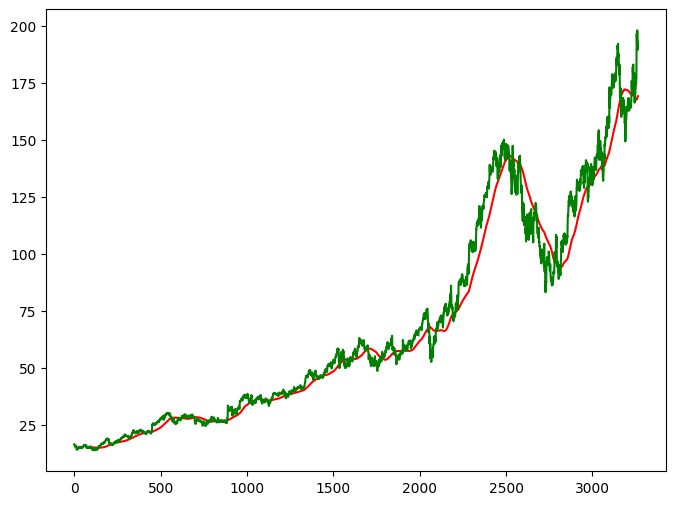

In [5]:
ma_100_days = data.Close.rolling(100).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(data.Close, 'g')
plt.show()

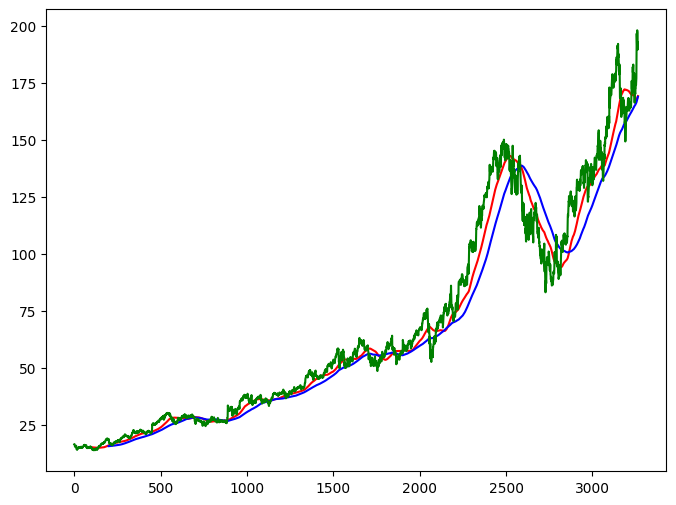

In [6]:
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))
plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days,'b')
plt.plot(data.Close,'g')
plt.show()

In [7]:
data.dropna(inplace=True)

In [8]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

In [9]:
data_train.shape[0]

2611

In [10]:
data_test.shape[0]

653

In [11]:
from sklearn.preprocessing import MinMaxScaler

#scaler that will transform the data to a range between 0 and 1
scaler = MinMaxScaler(feature_range=(0,1))

data_train_scale = scaler.fit_transform(data_train)

In [16]:
x = []
y = []

for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i-100:i])
    y.append(data_train_scale[i,0])

In [19]:
x, y = np.array(x), np.array(y)

In [23]:
from keras.layers import Dense, Dropout, LSTM, Input
from keras.models import Sequential

model = Sequential([
    Input(shape=(x.shape[1], 1)),
    LSTM(units=50, activation='relu', return_sequences=True),
    Dropout(0.2),
    
    LSTM(units=60, activation='relu', return_sequences=True),
    Dropout(0.3),
    
    LSTM(units=80, activation='relu', return_sequences=True),
    Dropout(0.4),
    
    LSTM(units=120, activation='relu'),
    Dropout(0.5),
    
    Dense(units=1)
])

In [24]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
model.fit(x,y, epochs = 50, batch_size =32, verbose =1)

Epoch 1/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - loss: 0.0478
Epoch 2/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0050
Epoch 3/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0051
Epoch 4/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0056
Epoch 5/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - loss: 0.0042
Epoch 6/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0045
Epoch 7/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0035
Epoch 8/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0026
Epoch 9/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0036
Epoch 10/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0028
Epoch 11/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0032
Epoch 12/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0032
Epoch 13/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0031
Epoch 14/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 67ms/step - loss: 0.0027
Epoch 15/50
79/79 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 0.0027
Epoc

In [26]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_5 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_7 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_8 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [27]:
pas_100_days = data_train.tail(100)

In [28]:
data_test = pd.concat([pas_100_days, data_test], ignore_index=True)
data_test_scale  =  scaler.fit_transform(data_test)

In [29]:
x = []
y = []

for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i-100:i])
    y.append(data_test_scale[i,0])
x, y = np.array(x), np.array(y)

In [30]:
y_predict = model.predict(x)

21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


In [31]:
scale =1/scaler.scale_

In [32]:
y_predict = y_predict*scale
y = y*scale

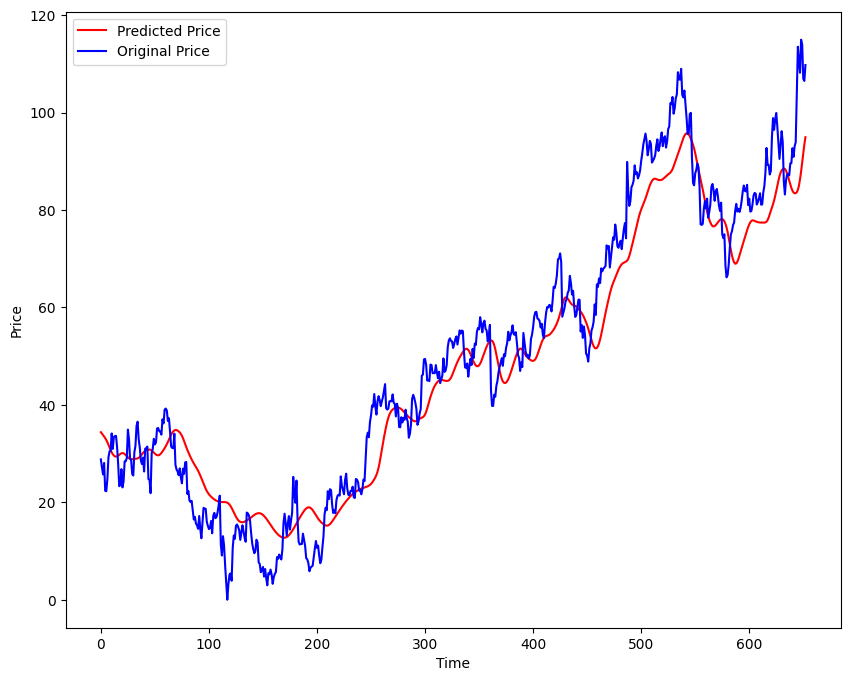

In [35]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'b', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [34]:
model.save('Stock Predictions Model.keras')